# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/master/files/country_music.jpeg "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Country Music Performers](https://en.wikipedia.org/wiki/List_of_country_music_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [Zach Bryan](https://en.wikipedia.org/wiki/Zach_Bryan) links to [Kacey Musgraves](https://en.wikipedia.org/wiki/Kacey_Musgraves), for example (it really does). You will note that the country music list includes performers that we don't typically think of as country musicians (e.g. [Bon Jovi](https://en.wikipedia.org/wiki/Bon_Jovi) or [Mark Knopfler](https://en.wikipedia.org/wiki/Mark_Knopfler), but we'll just roll with it and be open minded).

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment 2022**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

---

# Part A: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

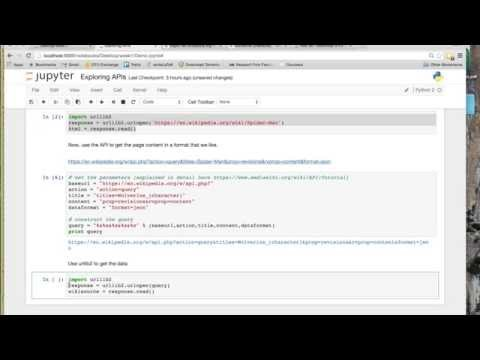

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_country_music_performers and extract all of the links using your regular expressions from above.
>   * Hint: To make this easy, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names.

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your download the cleanest possible version of the page (the wikitext). [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per character, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

In [3]:
import requests
from bs4 import BeautifulSoup
import os

def get_wikipedia_page_source(title):
    """
    Fetches the wiki-source of a Wikipedia page using the Wikipedia API.
    :param title: Title of the Wikipedia page
    :return: Raw wiki-source (wikitext) of the page
    """
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "titles": title,
        "rvprop": "content",
        "rvslots": "main"
    }

    response = requests.get(url, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    page_id, page_data = next(iter(pages.items()))
    
    if page_id == "-1":
        return f"Page '{title}' not found."

    return page_data["revisions"][0]["slots"]["main"]["*"]

# URL of the Wikipedia page containing the list of country music performers
url = "https://en.wikipedia.org/wiki/List_of_country_music_performers"

# Fetch the content of the page
response = requests.get(url)
response.raise_for_status()

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Extract performer names and create a list
performers = [a['href'].split('/')[-1] for a in soup.find_all('a', href=True) if a['href'].startswith('/wiki/')]

# Directory to save the text files
output_dir = 'country_performers'
os.makedirs(output_dir, exist_ok=True)

# Download text for each performer
for performer in performers:
    print(f"Downloading source for: {performer.replace('_', ' ')}")
    page_source = get_wikipedia_page_source(performer)
    
    # Save the content to a text file
    if page_source:
        file_name = f"{performer.replace('_', ' ')}.txt"
        file_path = os.path.join(output_dir, file_name)
        with open(file_path, 'w', encoding='utf-8') as f:
            f.write(page_source)
        print(f"Saved: {file_path}")
    else:
        print(f"No content found for: {performer}")

# Save the list of performers to a text file
with open(os.path.join(output_dir, 'performers_list.txt'), 'w', encoding='utf-8') as f:
    for performer in performers:
        f.write(f"{performer.replace('_', ' ')}\n")

print("Download completed.")


Saved: country_performers\Main Page.txt
Saved: country_performers\Wikipedia:Contents.txt
Saved: country_performers\Portal:Current events.txt
Saved: country_performers\Special:Random.txt
Saved: country_performers\Wikipedia:About.txt
Saved: country_performers\Help:Contents.txt
Saved: country_performers\Help:Introduction.txt
Saved: country_performers\Wikipedia:Community portal.txt
Saved: country_performers\Special:RecentChanges.txt
Saved: country_performers\Wikipedia:File upload wizard.txt
Saved: country_performers\Main Page.txt
Saved: country_performers\Special:Search.txt
Saved: country_performers\Help:Introduction.txt
Saved: country_performers\Special:MyContributions.txt
Saved: country_performers\Special:MyTalk.txt
Saved: country_performers\List of country music performers.txt
Saved: country_performers\Talk:List of country music performers.txt
Saved: country_performers\List of country music performers.txt
Saved: country_performers\List of country music performers.txt
Saved: country_perf

Saved: country_performers\Lisa Angelle.txt
Saved: country_performers\Michaela Anne.txt
Saved: country_performers\Lorenzo Antonio.txt
Saved: country_performers\Park.txt
Saved: country_performers\Katie Armiger.txt
Saved: country_performers\Eddy Arnold.txt
Saved: country_performers\Ashley Arrison.txt
Saved: country_performers\Tenille Arts.txt
Saved: country_performers\Leon Ashley.txt
Saved: country_performers\Kassi Ashton.txt
Saved: country_performers\Susan Ashton.txt
Saved: country_performers\Ernest Ashworth.txt
Saved: country_performers\Asleep at the Wheel.txt
Saved: country_performers\Chet Atkins.txt
Saved: country_performers\Rodney Atkins.txt
Saved: country_performers\Audrey Auld-Mezera.txt
Saved: country_performers\Bryan Austin.txt
Saved: country_performers\Julian Austin (musician).txt
Saved: country_performers\Shawn Austin.txt
Saved: country_performers\Sherri%C3%A9 Austin.txt
Saved: country_performers\Gene Autry.txt
Saved: country_performers\Autumn Hill.txt
Saved: country_performers

Saved: country_performers\Big House (American band).txt
Saved: country_performers\Big Kenny.txt
Saved: country_performers\Big Smo.txt
Saved: country_performers\Big Tom.txt
Saved: country_performers\Bill Haley %26 His Comets.txt
Saved: country_performers\Billy Hill (supergroup).txt
Saved: country_performers\Ryan Bingham.txt
Saved: country_performers\Scott H. Biram.txt
Saved: country_performers\George Birge.txt
Saved: country_performers\Jaydee Bixby.txt
Saved: country_performers\Maggie Bj%C3%B6rklund.txt
Saved: country_performers\Clint Black.txt
Saved: country_performers\Lisa Hartman Black.txt
Saved: country_performers\The Black Lillies.txt
Saved: country_performers\Black Tie (band).txt
Saved: country_performers\Blackberry Smoke.txt
Saved: country_performers\Blackhawk (band).txt
Saved: country_performers\Jason Blaine.txt
Saved: country_performers\Blake %26 Brian.txt
Saved: country_performers\Norman Blake (American musician).txt
Saved: country_performers\Clay Blaker.txt
Saved: country_per

Saved: country_performers\Felice and Boudleaux Bryant.txt
Saved: country_performers\Jimmy Bryant.txt
Saved: country_performers\Keith Bryant.txt
Saved: country_performers\Laura Bryna.txt
Saved: country_performers\The Buckaroos.txt
Saved: country_performers\The Buffalo Club.txt
Saved: country_performers\Buffalo Springfield.txt
Saved: country_performers\Jimmy Buffett.txt
Saved: country_performers\Laura Bell Bundy.txt
Saved: country_performers\John Bunzow.txt
Saved: country_performers\The Burch Sisters.txt
Saved: country_performers\Sinead Burgess.txt
Saved: country_performers\Wilma Burgess.txt
Saved: country_performers\T Bone Burnett.txt
Saved: country_performers\Billy Burnette.txt
Saved: country_performers\Smiley Burnette.txt
Saved: country_performers\Burnin%27 Daylight.txt
Saved: country_performers\Burns %26 Poe.txt
Saved: country_performers\Gary Burr.txt
Saved: country_performers\Johnny Bush.txt
Saved: country_performers\Kristian Bush.txt
Saved: country_performers\Sam Bush.txt
Saved: co

Saved: country_performers\Jason Cassidy.txt
Saved: country_performers\CB30.txt
Saved: country_performers\Bill Chambers (musician).txt
Saved: country_performers\Kasey Chambers.txt
Saved: country_performers\Chance (band).txt
Saved: country_performers\Jeff Chance.txt
Saved: country_performers\Chapel Hart.txt
Saved: country_performers\Beth Nielsen Chapman.txt
Saved: country_performers\Cee Cee Chapman.txt
Saved: country_performers\Donovan Chapman.txt
Saved: country_performers\Marshall Chapman.txt
Saved: country_performers\Ray Charles.txt
Saved: country_performers\Diane Chase.txt
Saved: country_performers\Will Chase.txt
Saved: country_performers\Chasin%27 Crazy.txt
Saved: country_performers\Kristin Chenoweth.txt
Saved: country_performers\Kenny Chesney.txt
Saved: country_performers\Mark Chesnutt.txt
Saved: country_performers\The Chicks.txt
Saved: country_performers\Tyler Childers.txt
Saved: country_performers\Andy Childs.txt
Saved: country_performers\Henry Cho.txt
Saved: country_performers\Ch

Saved: country_performers\Cowboy Copas.txt
Saved: country_performers\Cowboy Crush.txt
Saved: country_performers\Cowboy Junkies.txt
Saved: country_performers\Cowboy Troy.txt
Saved: country_performers\Don Cox (singer).txt
Saved: country_performers\The Cox Family.txt
Saved: country_performers\Billy %22Crash%22 Craddock.txt
Saved: country_performers\Adam Craig (singer-songwriter).txt
Saved: country_performers\Floyd Cramer.txt
Saved: country_performers\West.txt
Saved: country_performers\Roger Creager.txt
Saved: country_performers\Creedence Clearwater Revival.txt
Saved: country_performers\Melodie Crittenden.txt
Saved: country_performers\Charley Crockett.txt
Saved: country_performers\Crooked Still.txt
Saved: country_performers\Rob Crosby.txt
Saved: country_performers\Cross Canadian Ragweed.txt
Saved: country_performers\Crossin Dixon.txt
Saved: country_performers\Joel Crouse.txt
Saved: country_performers\Sheryl Crow.txt
Saved: country_performers\Rodney Crowell.txt
Saved: country_performers\The

Saved: country_performers\Jonny Diaz.txt
Saved: country_performers\Little Jimmy Dickens.txt
Saved: country_performers\Russell Dickerson.txt
Saved: country_performers\Tyler Dickerson.txt
Saved: country_performers\Joe Diffie.txt
Saved: country_performers\Dean Dillon.txt
Saved: country_performers\Diplo.txt
Saved: country_performers\The Dirt Drifters.txt
Saved: country_performers\Dixiana (band).txt
Saved: country_performers\Doc Walker.txt
Saved: country_performers\Deryl Dodd.txt
Saved: country_performers\Cale Dodds.txt
Saved: country_performers\Casey Donahew.txt
Saved: country_performers\Amber Dotson.txt
Saved: country_performers\Jerry Douglas.txt
Saved: country_performers\Ronnie Dove.txt
Saved: country_performers\Al Downing (musician).txt
Saved: country_performers\Dusty Drake.txt
Saved: country_performers\Drew Davis Band.txt
Saved: country_performers\Jaida Dreyer.txt
Saved: country_performers\Roy Drusky.txt
Saved: country_performers\George Ducas (singer).txt
Saved: country_performers\Came

Saved: country_performers\Tennessee Ernie Ford.txt
Saved: country_performers\Barbara Fairchild.txt
Saved: country_performers\Shelly Fairchild.txt
Saved: country_performers\McKenna Faith.txt
Saved: country_performers\Rose Falcon.txt
Saved: country_performers\David Fanning (singer).txt
Saved: country_performers\Donna Fargo.txt
Saved: country_performers\The Farm (American band).txt
Saved: country_performers\Farmer%27s Daughter (band).txt
Saved: country_performers\Tyler Farr.txt
Saved: country_performers\Jay Farrar.txt
Saved: country_performers\Jessie Farrell.txt
Saved: country_performers\Fast Ryde.txt
Saved: country_performers\Jimmy Lee Fautheree.txt
Saved: country_performers\Charlie Feathers.txt
Saved: country_performers\Joey Feek.txt
Saved: country_performers\Rory Feek.txt
Saved: country_performers\Joel Feeney.txt
Saved: country_performers\Terry Fell.txt
Saved: country_performers\Dick Feller.txt
Saved: country_performers\Narvel Felts.txt
Saved: country_performers\Freddy Fender.txt
Saved

Saved: country_performers\Jim Glaser.txt
Saved: country_performers\Tompall Glaser.txt
Saved: country_performers\Gloriana (band).txt
Saved: country_performers\Teea Goans.txt
Saved: country_performers\Danny Gokey.txt
Saved: country_performers\William Lee Golden.txt
Saved: country_performers\The Goldens.txt
Saved: country_performers\Bobby Goldsboro.txt
Saved: country_performers\Gone West (band).txt
Saved: country_performers\Goose Creek Symphony.txt
Saved: country_performers\Robert Gordon (musician).txt
Saved: country_performers\Vern Gosdin.txt
Saved: country_performers\The Gourds.txt
Saved: country_performers\Josh Gracin.txt
Saved: country_performers\Tammy Graham.txt
Saved: country_performers\Billy Grammer.txt
Saved: country_performers\Gil Grand.txt
Saved: country_performers\Steve Grand.txt
Saved: country_performers\Amy Grant.txt
Saved: country_performers\The Grascals.txt
Saved: country_performers\Claude Gray.txt
Saved: country_performers\The Great Divide (band).txt
Saved: country_perform

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'Se ha forzado la interrupción de una conexión existente por el host remoto', None, 10054, None))

---

# Part B: Building the networks

Now, we're going to build a single NetworkX directed graph with all the country performers. 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer, which is a node in your network. 
* Find all the hyperlinks in a performers page that link to another node of the network (e.g. an other perfomer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Country Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have around 2k nodes and around 18k edges.
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 3*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


In [6]:
import os
import re
import requests
import networkx as nx
from bs4 import BeautifulSoup

# Function to extract links from a performer's page
def extract_links(page_content, performers):
    # Regular expression to find links
    links = re.findall(r'\[\[([^\]|]+)', page_content)  # Matches [[Link]]
    return [link.replace(' ', '_') for link in links if link in performers]

# Load performer names from the directory
output_dir = 'country_performers'
performers = [f.replace('.txt', '').replace(' ', '_') for f in os.listdir(output_dir) if f.endswith('.txt')]

# Create a directed graph
G = nx.DiGraph()

# Build the network
for performer in performers:
    file_path = os.path.join(output_dir, f"{performer.replace('_', ' ')}.txt")
    
    with open(file_path, 'r', encoding='utf-8') as f:
        page_content = f.read()
        
    # Extract links from the page content
    links = extract_links(page_content, performers)
    
    # Add node with word count as an attribute
    word_count = len(re.findall(r'\b\w+\b', page_content))
    G.add_node(performer, word_count=word_count)
    
    # Add edges to the graph
    for link in links:
        G.add_edge(performer, link)

# Remove isolated nodes
isolated_nodes = [node for node in G.nodes() if G.out_degree(node) == 0 and G.in_degree(node) == 0]
G.remove_nodes_from(isolated_nodes)

# Extract the largest weakly connected component
largest_component = max(nx.weakly_connected_components(G), key=len)
H = G.subgraph(largest_component).copy()

print(f"Number of nodes in the largest component: {H.number_of_nodes()}")
print(f"Number of edges in the largest component: {H.number_of_edges()}")

# Optionally, save the graph or perform further analysis
# nx.write_gexf(H, "country_performers_network.gexf")

# Display basic stats
print("Graph Stats:")
print(f"Total nodes: {H.number_of_nodes()}")
print(f"Total edges: {H.number_of_edges()}")


Number of nodes in the largest component: 6
Number of edges in the largest component: 7
Graph Stats:
Total nodes: 6
Total edges: 7


In [8]:
# Find the node with the highest out-degree in the largest component
max_out_degree_node = max(H.nodes(data=True), key=lambda x: H.out_degree(x[0]))
node_name, out_degree = max_out_degree_node

print(f"Node with the highest out-degree: {node_name}")


Node with the highest out-degree: Cam_(singer)



> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

In [9]:
print(f"Total number of nodes in the network: {G.number_of_nodes()}")
print(f"Total number of links (edges) in the network: {G.number_of_edges()}")


Total number of nodes in the network: 11
Total number of links (edges) in the network: 10


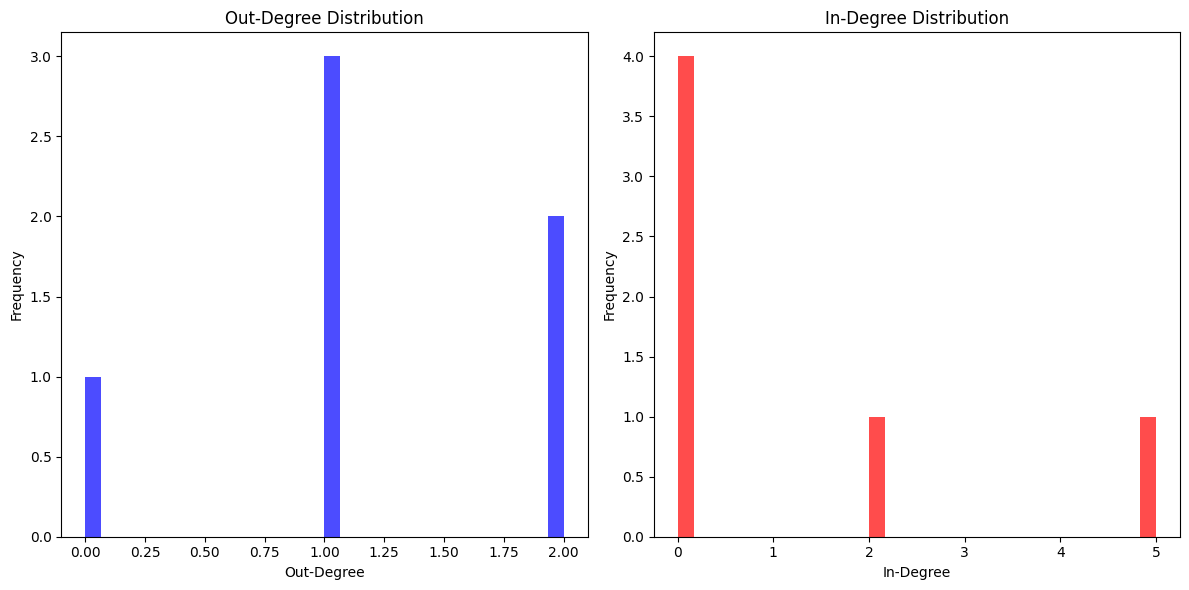

In [10]:
import matplotlib.pyplot as plt

# Calculate in-degrees and out-degrees
in_degrees = [H.in_degree(n) for n in H.nodes()]
out_degrees = [H.out_degree(n) for n in H.nodes()]

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Out-degree distribution
plt.subplot(1, 2, 1)
plt.hist(out_degrees, bins=30, color='blue', alpha=0.7)
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

# In-degree distribution
plt.subplot(1, 2, 2)
plt.hist(in_degrees, bins=30, color='red', alpha=0.7)
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


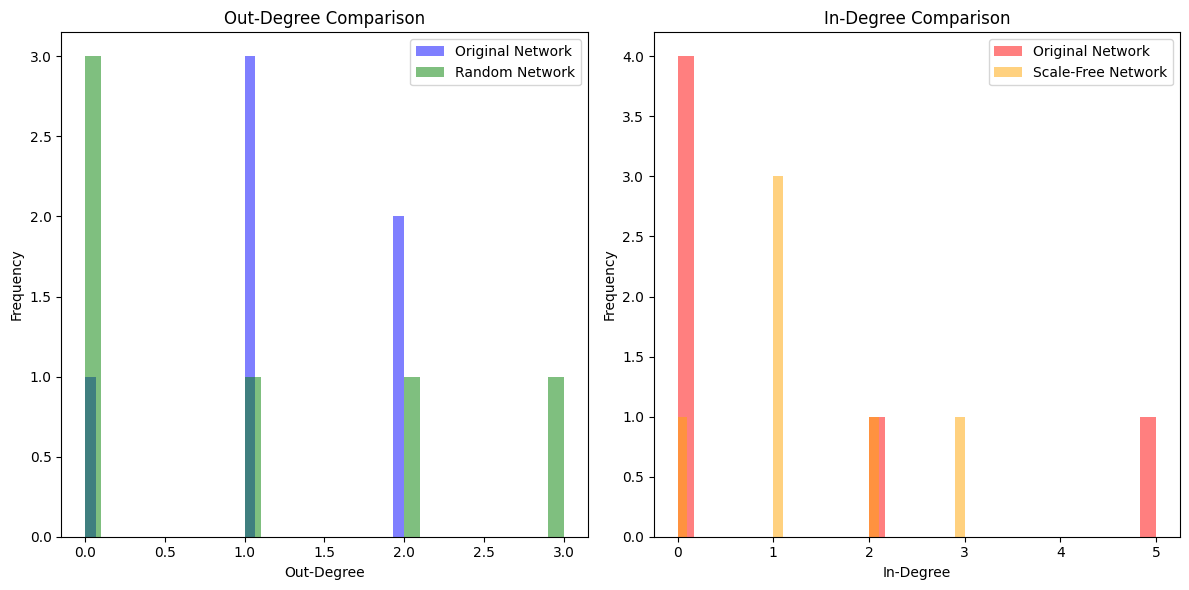

In [11]:
import numpy as np

# Parameters for random and scale-free networks
num_nodes = H.number_of_nodes()
num_edges = H.number_of_edges()

# Random network
random_graph = nx.gnp_random_graph(num_nodes, num_edges / (num_nodes * (num_nodes - 1)), directed=True)
random_out_degrees = [random_graph.out_degree(n) for n in random_graph.nodes()]

# Scale-free network
scale_free_graph = nx.barabasi_albert_graph(num_nodes, 2)  # Adjust second parameter for average degree
scale_free_graph = nx.DiGraph(scale_free_graph)  # Convert to directed
scale_free_out_degrees = [scale_free_graph.out_degree(n) for n in scale_free_graph.nodes()]

# Plotting the comparisons
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(out_degrees, bins=30, color='blue', alpha=0.5, label='Original Network')
plt.hist(random_out_degrees, bins=30, color='green', alpha=0.5, label='Random Network')
plt.title('Out-Degree Comparison')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(in_degrees, bins=30, color='red', alpha=0.5, label='Original Network')
plt.hist(np.random.poisson(lam=np.mean(in_degrees), size=len(in_degrees)), bins=30, color='orange', alpha=0.5, label='Scale-Free Network')
plt.title('In-Degree Comparison')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Top 5 performers by in-degree
top_in_degrees = sorted(H.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 performers by in-degree:")
for performer, degree in top_in_degrees:
    print(f"{performer}: {degree}")

# Top 5 performers by out-degree
top_out_degrees = sorted(H.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 performers by out-degree:")
for performer, degree in top_out_degrees:
    print(f"{performer}: {degree}")


Top 5 performers by in-degree:
Diplo: 5
Avicii: 2
Cam_(singer): 0
Danielle_Bradbery: 0
Justin_Bieber: 0

Top 5 performers by out-degree:
Cam_(singer): 2
Zac_Brown: 2
Avicii: 1
Danielle_Bradbery: 1
Justin_Bieber: 1


In [13]:
# Get the 10 pages with the longest entries
longest_pages = sorted(H.nodes(data=True), key=lambda x: x[1]['word_count'], reverse=True)[:10]
print("\nTop 10 pages with the longest wiki entries:")
for performer, attributes in longest_pages:
    print(f"{performer}: {attributes['word_count']} words")



Top 10 pages with the longest wiki entries:
Justin_Bieber: 50693 words
Avicii: 25647 words
Diplo: 11875 words
Danielle_Bradbery: 7807 words
Cam_(singer): 5256 words
Zac_Brown: 2308 words


# Part C: Visualizing the networks

*Exercise:* Let's build a simple visualization of network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises.
>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

And don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.

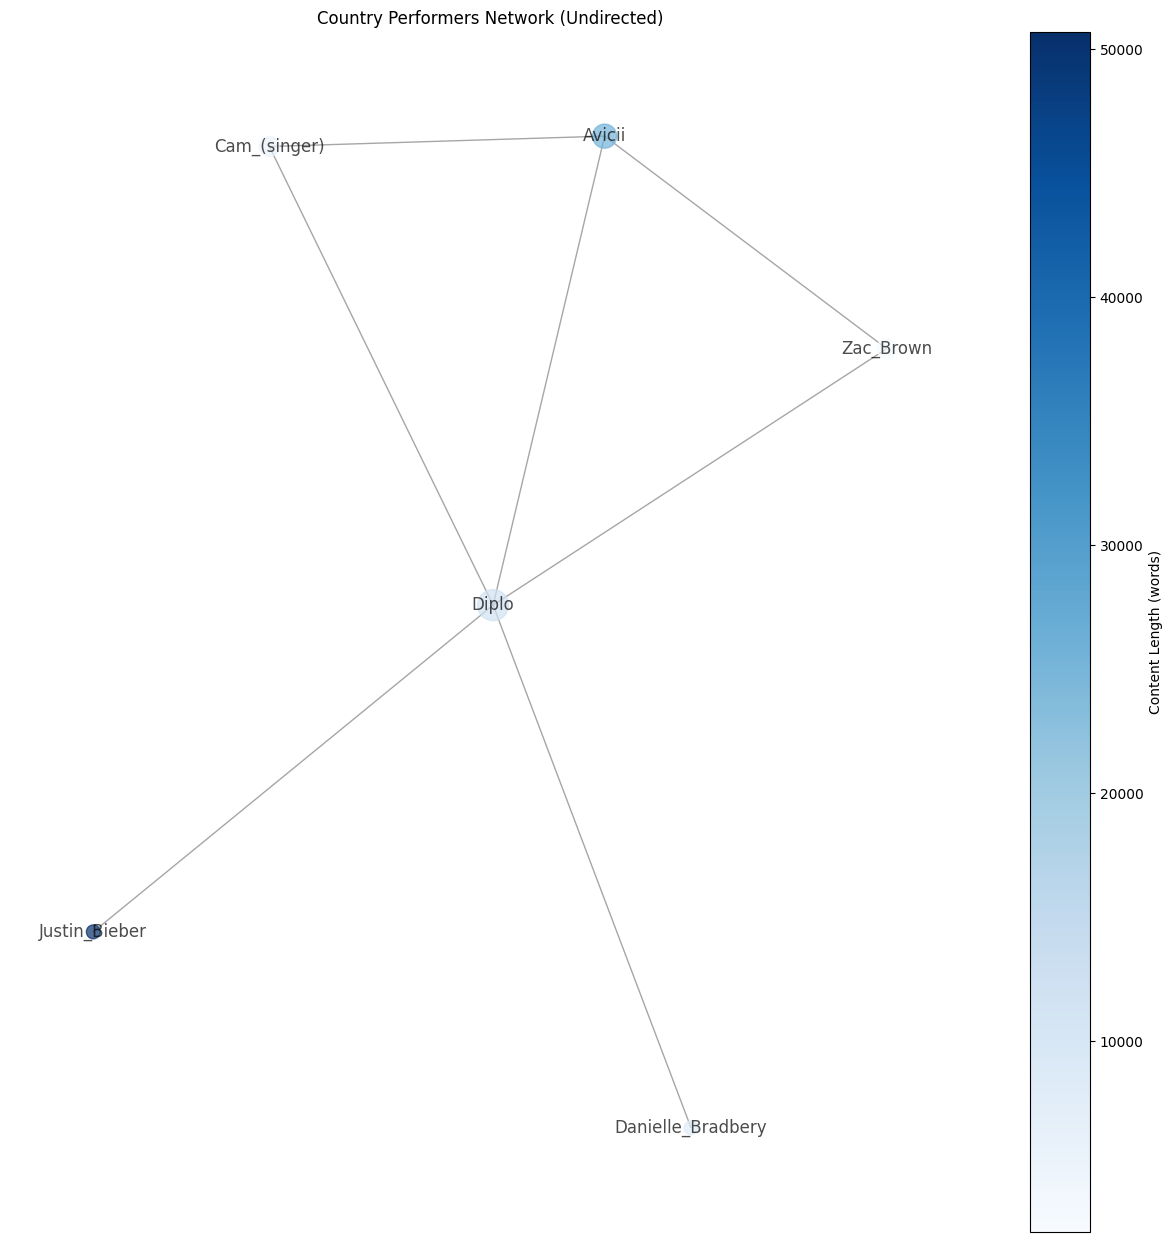

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assume H is your directed graph from the previous steps
# Convert directed graph to undirected
undirected_graph = H.to_undirected()

# Get degrees and content length for node sizes and colors
degrees = np.array([undirected_graph.degree(n) for n in undirected_graph.nodes()])
content_lengths = np.array([undirected_graph.nodes[n]['word_count'] for n in undirected_graph.nodes()])

# Normalize content lengths for coloring
norm_content_lengths = (content_lengths - np.min(content_lengths)) / (np.max(content_lengths) - np.min(content_lengths))

# Set up the plot
plt.figure(figsize=(12, 12))

# Draw the undirected graph using Spring layout
pos = nx.spring_layout(undirected_graph)
node_size = degrees * 100  # Scale the node size
node_color = norm_content_lengths  # Use normalized content lengths for color

# Use a sequential colormap
cmap = plt.get_cmap('Blues')  # Choose a simple color scheme

# Draw the graph
nx.draw(undirected_graph, pos, with_labels=True, node_size=node_size, 
        node_color=node_color, cmap=cmap, alpha=0.7, edge_color='gray')

# Create the colorbar on the current figure
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(content_lengths), vmax=np.max(content_lengths)))
sm.set_array([])  # Needed for older versions of matplotlib

# Explicitly define the colorbar
cbar = plt.colorbar(sm, ax=plt.gca())  # Use the current axes for the colorbar
cbar.set_label('Content Length (words)')  # Add label to colorbar

plt.title("Country Performers Network (Undirected)")
plt.axis('off')  # Hide the axes
plt.show()
